In [588]:
%matplotlib inline

import geopandas as gpd
import pandas as pd
import pickle
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

import clusterpy

from library.regression import countries_regressions

ClusterPy: Library of spatially constrained clustering algorithms


In [571]:
# load, clean, and normalize country-level lights data
with open('data/geo/pickles/zonal_stats_c.pickle') as f:
    gdf = pickle.load(f)
gdf = pd.DataFrame(gdf)
gdf = gdf.drop_duplicates(subset='WB_A3')
gdf = gdf.set_index('WB_A3')
gdf.drop(['ADMIN', 'CONTINENT', 'ISO_A3', 'REGION_UN', 'REGION_WB', 'SUBREGION', 'geometry'], axis=1, inplace=True)
gdf_normalizer = (gdf.F101992).as_matrix()
gdf_normed = gdf.divide(gdf_normalizer, axis=0)

# Load, clean, and normalize wb data
wb = pd.read_csv('data/econ/wb.csv')

# wb = wb[wb['Series Name'] == 'GDP at market prices (constant 2005 US$)']
label = 'GDP, PPP (constant 2011 international $)'
wb = wb[wb['Series Name'] == label]
wb.drop(['Country Name', 'Series Name', 'Series Code', '2014', '2015'], axis=1, inplace=True)
wb.rename(columns={'Country Code': 'WB_A3'}, inplace=True)
wb.dropna(axis=0, inplace=True)
wb = wb.set_index('WB_A3')
wb_normalizer = (wb['1992']).as_matrix()
wb_normed = wb.divide(wb_normalizer, axis=0)

# join lights and wb datasets
df = gdf_normed.join(wb_normed, how='inner')

# pickle joined dataframe
df.to_pickle('data/cleaned_df.pickle')

In [579]:
# import cleaned dataframe
df = pd.read_pickle('data/cleaned_df.pickle'); df.head(3)

,F101992,F101993,F101994,F121994,F121995,F121996,F121997,F121998,F121999,F141997,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
WB_A3,,,,,,,,,,,,,,,,,,,,,
ALB,1.0,2.628394,3.087411,4.743126,5.511153,4.825264,5.901003,6.095106,6.328117,2.821373,...,2.171891,2.296141,2.420845,2.563675,2.756720,2.849070,2.954770,3.030117,3.073145,3.107257
DZA,1.0,1.027205,1.034877,0.943117,1.220886,1.189387,1.340228,1.477018,1.291055,1.008942,...,1.451161,1.536779,1.562906,1.616043,1.648364,1.674737,1.735030,1.783610,1.842472,1.894061
ATG,1.0,1.259259,1.249585,1.457435,1.457159,1.487562,1.636816,1.753179,1.917358,1.343007,...,1.525237,1.618020,1.834453,2.008707,2.010135,1.768195,1.641893,1.612447,1.677260,1.671452


In [583]:
df_regression = countries_regressions(df).sort_values(by='r', ascending=False); df_regression.head(3)

,beta,intercept,r,r_adj,p_beta,p_int,c_beta_low,c_beta_high,c_int_low,c_int_high
country,,,,,,,,,,
CHN,2.106015,-1.055181,0.910429,0.907630,2.510666e-18,1.611028e-04,1.868154,2.343877,-1.558030,-0.552332
ETH,0.763003,0.155990,0.897381,0.894175,2.226664e-17,2.176451e-01,0.670095,0.855911,-0.096672,0.408653
OMN,0.260783,0.905796,0.896843,0.893619,2.421829e-17,3.393900e-23,0.228935,0.292630,0.835400,0.976193


In [584]:
df_regression.to_csv('data/cty_stats.csv')

In [ ]:
#country_lights = df.ix['KEN'][0:34].tolist()
#X_t = X.T

#coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))    #use the classic formula
#X_t.shape

#plt.figure(figsize = (20,10))    #initiate the plot
#plt.plot(X['Ind_Variable_1'],y,'bs',lw=4)    #generate the plot
#plt.plot(X,y,'bs',lw=4)    #generate the plot
#plt.xlabel(r'$x_1$',fontsize=10)    #add an x label
#plt.ylabel(r'$y$',fontsize=10)    #add a y label

In [284]:
#estimating coefficients using sklearnL
#model = LinearRegression()    #define which model to apply
#model.fit(X, y)    #fit the model
type(np.asarray(y)), type(y)

(numpy.ndarray, numpy.ndarray)

In [587]:
!pip install clusterpy

    100% |████████████████████████████████| 71kB 1.2MB/s 
  Running setup.py bdist_wheel for clusterpy ... - \ done
  Stored in directory: /Users/peter/Library/Caches/pip/wheels/0e/4a/49/bb814e1f06991407523169eaa058c35d66b227e8f381f03350
Successfully built clusterpy
You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


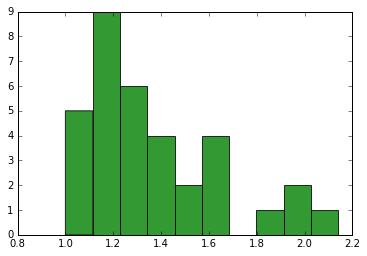

In [249]:
fig = plt.figure()
numBins = 10
ax = fig.add_subplot(111)
ax.hist(y,numBins,color='green',alpha=0.8)
plt.show()